<a href="https://colab.research.google.com/github/IsharaXD/SingleTaskCYP450/blob/main/cyp1a2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Use the raw file URL
url = 'https://raw.githubusercontent.com/idrugLab/FP-GNN_CYP/main/data/CYP_single-task/train/cyp1a2_train.csv'

# Read the CSV file
df = pd.read_csv(url)

# Display the DataFrame
df

,Smiles,labels
0,NCCc1c[nH]c2ccccc12,1
1,CCn1c(=O)c2[nH]c(-c3ccccc3)nc2n(CC)c1=O,1
2,Clc1cccc(Nc2nnc(-c3ccccc3)c3ccccc23)c1,1
3,Nn1nnc2ccccc21,1
4,O=C(c1ccc2c(c1)OCO2)N1CCCCC1,1
...,...,...
9352,Oc1ccc2c3c1OC1C(O)CCC4(O)C(C2)N(CC2CCC2)CCC314,0
9353,c1ccc(CN(CC2=NCCN2)c2ccccc2)cc1,0
9354,c1ccc(CNCCN2CCNCC2)nc1,0
9355,c1ccc2c(c1)CCCC2C1=NCCN1,0


In [2]:
print(df.head())

                                    Smiles  labels
0                      NCCc1c[nH]c2ccccc12       1
1  CCn1c(=O)c2[nH]c(-c3ccccc3)nc2n(CC)c1=O       1
2   Clc1cccc(Nc2nnc(-c3ccccc3)c3ccccc23)c1       1
3                           Nn1nnc2ccccc21       1
4             O=C(c1ccc2c(c1)OCO2)N1CCCCC1       1


#Checking for missing values, dubplicates


In [3]:
print(df.isnull().sum())


Smiles    0
labels    0
dtype: int64


In [4]:
print(df.duplicated().sum())

1


In [5]:
df = df.drop_duplicates()

print(df.duplicated().sum())

0


#Check the distribution of labels


In [6]:
print(df['labels'].value_counts())

labels
0    4885
1    4471
Name: count, dtype: int64


# Checking for normalization

In [7]:
print(df.describe())

            labels
count  9356.000000
mean      0.477875
std       0.499537
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000


In [8]:
df

,Smiles,labels
0,NCCc1c[nH]c2ccccc12,1
1,CCn1c(=O)c2[nH]c(-c3ccccc3)nc2n(CC)c1=O,1
2,Clc1cccc(Nc2nnc(-c3ccccc3)c3ccccc23)c1,1
3,Nn1nnc2ccccc21,1
4,O=C(c1ccc2c(c1)OCO2)N1CCCCC1,1
...,...,...
9352,Oc1ccc2c3c1OC1C(O)CCC4(O)C(C2)N(CC2CCC2)CCC314,0
9353,c1ccc(CN(CC2=NCCN2)c2ccccc2)cc1,0
9354,c1ccc(CNCCN2CCNCC2)nc1,0
9355,c1ccc2c(c1)CCCC2C1=NCCN1,0


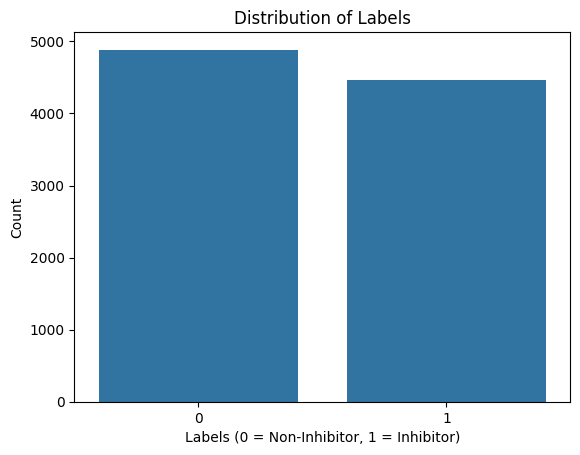

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of labels
sns.countplot(x="labels", data=df)
plt.title("Distribution of Labels")
plt.xlabel("Labels (0 = Non-Inhibitor, 1 = Inhibitor)")
plt.ylabel("Count")
plt.show()

In [10]:
!pip install rdkit
from rdkit import Chem

In [11]:
# Function to check if a SMILES string is valid
def is_valid_smiles(smiles):
    return Chem.MolFromSmiles(smiles) is not None

# Check validity of all SMILES strings
validity = df["Smiles"].apply(is_valid_smiles)
print("Number of invalid SMILES:", len(validity) - sum(validity))

Number of invalid SMILES: 0


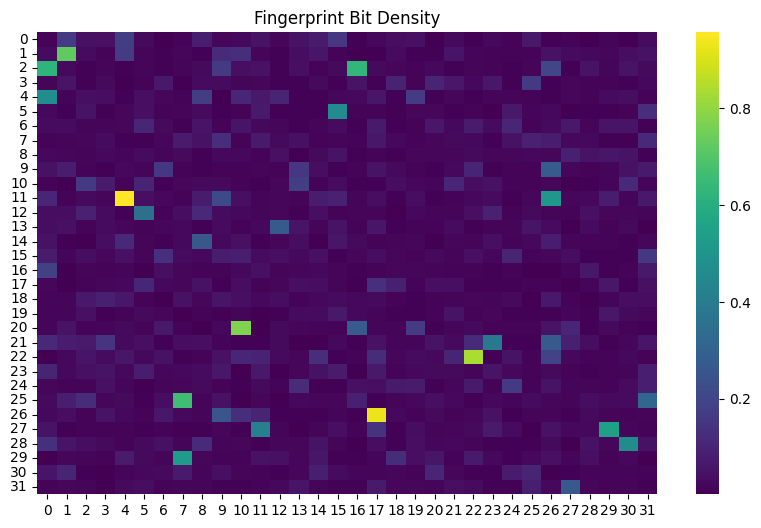

In [12]:
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

# Compute Morgan fingerprints for all molecules
def compute_fingerprints(smiles_list, radius=2, nBits=1024):
    morgan_generator = AllChem.GetMorganGenerator(radius=radius, fpSize=nBits)
    fingerprints = [morgan_generator.GetFingerprint(Chem.MolFromSmiles(s)) for s in smiles_list]
    return fingerprints

fingerprints = compute_fingerprints(df["Smiles"])

# Convert fingerprints to a numpy array
fingerprint_matrix = np.array([np.array(fp) for fp in fingerprints])

# Plot the density of fingerprint bits
plt.figure(figsize=(10, 6))
sns.heatmap(fingerprint_matrix.mean(axis=0).reshape(32, 32), cmap="viridis")
plt.title("Fingerprint Bit Density")
plt.show()

In [23]:
import pandas as pd

# Load datasets (Make sure df is already loaded as train_df)
train_df = df

# Use RAW file URLs for test and validation sets
turl = 'https://raw.githubusercontent.com/idrugLab/FP-GNN_CYP/main/data/CYP_single-task/test/cyp1a2_test.csv'
vurl = 'https://raw.githubusercontent.com/idrugLab/FP-GNN_CYP/main/data/CYP_single-task/val/cyp1a2_val.csv'

# Load test and validation datasets
test_df = pd.read_csv(turl)
val_df = pd.read_csv(vurl)

# Check the loaded data
print("Test Dataset:")
print(test_df.head())

print("Validation Dataset:")
print(val_df.head())



Test Dataset:
                                       Smiles  labels
0  NC(Cn1ccc(=O)n(Cc2ccccc2C(=O)O)c1=O)C(=O)O       0
1                        c1ccc(CCc2cccnc2)nc1       1
2         CCOC(=O)Cn1nc(C)n(-c2ccc(C)cc2)c1=O       0
3      Cc1cc(O)c2c(c1)C(=O)c1cc(O)cc(O)c1C2=O       1
4     CN(C(=O)C(Cl)Cl)c1ccc(OC(=O)c2ccco2)cc1       0
Validation Dataset:
                            Smiles  labels
0      CCCCCC(=NO)c1c[nH]c2ccccc12       1
1  CCNc1ncc2nc(C)c(=O)n(CCC#N)c2n1       1
2          COc1ncc2ncc(=O)n(C)c2n1       1
3   CCc1c(C(=O)O)[nH]c2ccc(Br)cc12       1
4          O=C(O)C(Cc1cn[nH]n1)=NO       0


In [46]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

# Function to compute Morgan fingerprints using MorganGenerator
def compute_fingerprints(smiles_list, radius=2, nBits=1024):
    fingerprints = []
    invalid_smiles = []  # Track invalid SMILES for debugging

    # Create a Morgan fingerprint generator
    morgen_generator = AllChem.GetMorganGenerator(radius=radius, fpSize=nBits)

    for idx, smiles in enumerate(smiles_list):
        mol = Chem.MolFromSmiles(smiles)
        if mol:  # Ensure valid SMILES
            fp = morgen_generator.GetFingerprint(mol)
            arr = np.zeros((nBits,))
            DataStructs.ConvertToNumpyArray(fp, arr)
            fingerprints.append(arr)
        else:
            fingerprints.append(np.zeros(nBits))  # Handle invalid SMILES
            invalid_smiles.append((idx, smiles))  # Log invalid SMILES

    if invalid_smiles:
        print(f"Warning: {len(invalid_smiles)} invalid SMILES found.")
        for idx, smiles in invalid_smiles:
            print(f"Index {idx}: {smiles}")

    return np.array(fingerprints)

# Example usage (assuming train_df, test_df, and val_df are defined)
X_train = compute_fingerprints(train_df["Smiles"])
X_test = compute_fingerprints(test_df["Smiles"])
X_val = compute_fingerprints(val_df["Smiles"])

# Extract labels
y_train = train_df["labels"].values
y_test = test_df["labels"].values
y_val = val_df["labels"].values

print("Feature shapes:", X_train.shape, X_test.shape, X_val.shape)

Feature shapes: (9356, 1024) (1000, 1024) (2000, 1024)


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=130, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on validation data
y_val_pred = rf_model.predict(X_val)

# Evaluate accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)


Validation Accuracy: 0.834


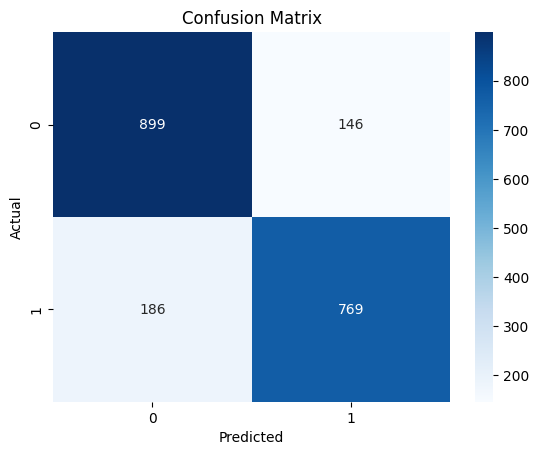

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1045
           1       0.84      0.81      0.82       955

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000

ROC-AUC Score: 0.9107933565470077


In [42]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_val, rf_model.predict_proba(X_val)[:, 1])
print("ROC-AUC Score:", roc_auc)
